In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import pickle

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import seaborn as sns


In [6]:
ucdp = pd.read_csv("/home/polichinel/Dropbox/KU/9.semester/friopgave/data/upsala/ged181.csv")# the error is not importent as you do not use that feature 

ucdp =  ucdp[ucdp['gwnob'].isna()] # only conflicts NOT between to stats

ucdp_1990 = ucdp[(ucdp['year'] >= 1990) & (ucdp['year'] <= 2010)]

features = ['year', 'latitude', 'longitude', 'priogrid_gid', 'country', 'country_id', 'region', 'best']

ucdp_lean = ucdp_1990[features].copy()

/home/polichinel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
ucdp['year'].describe()

count    142160.000000
mean       2005.413527
std           8.077136
min        1989.000000
25%        1999.000000
50%        2007.000000
75%        2012.000000
max        2017.000000
Name: year, dtype: float64

In [41]:
ucdp_lean['binary_best'] = np.array(ucdp_lean['best']>0).astype(int)

year_deaths = ucdp_lean.groupby(by='year').sum()

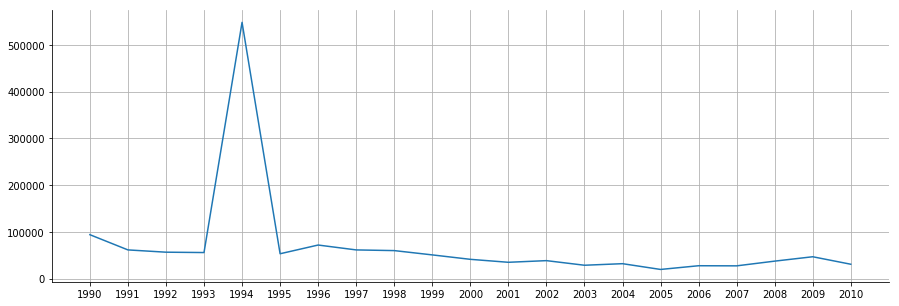

In [24]:
plt.plot(year_deaths.index,year_deaths['best'])

plt.xticks(np.arange(1990,2011))

sns.despine()
plt.grid()
plt.show()

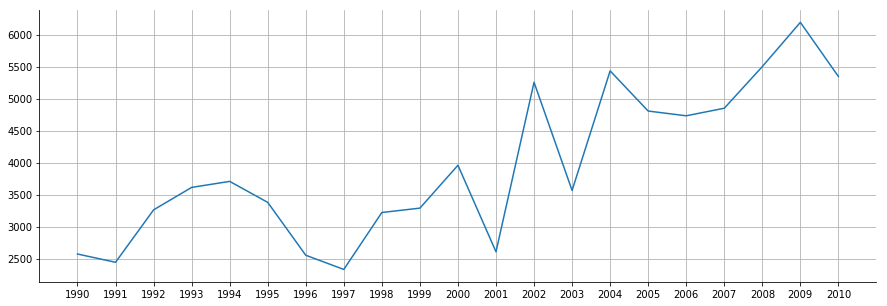

In [44]:
plt.plot(year_deaths.index,year_deaths['binary_best'])

plt.xticks(np.arange(1990,2011))

sns.despine()
plt.grid()
plt.show()

In [53]:
year_deaths.loc[2009,['best','binary_best']]

best           46772.0
binary_best     6194.0
Name: 2009, dtype: float64